In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset

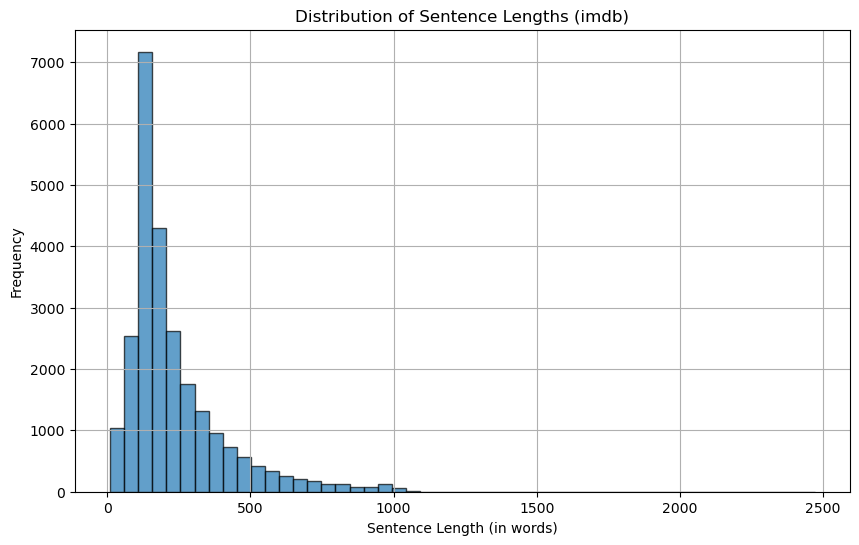

In [3]:
# Load a dataset from Hugging Face
dataset = load_dataset("imdb", split='train')

# Compute the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in dataset['text']]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentence Lengths (imdb)')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

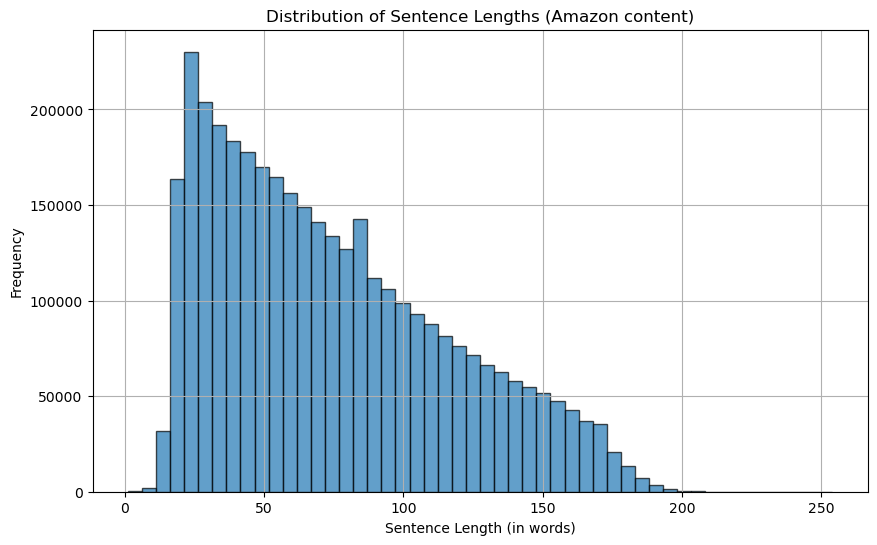

In [4]:
# Load a dataset from Hugging Face
dataset = load_dataset("fancyzhx/amazon_polarity", split='train')

# Compute the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in dataset['content']]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentence Lengths (Amazon content)')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

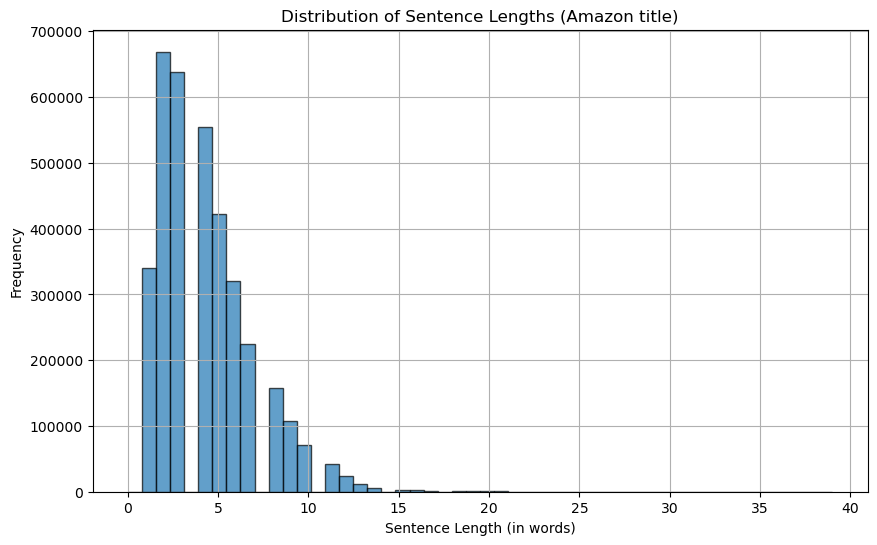

In [5]:
# Load a dataset from Hugging Face
dataset = load_dataset("fancyzhx/amazon_polarity", split='train')

# Compute the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in dataset['title']]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentence Lengths (Amazon title)')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

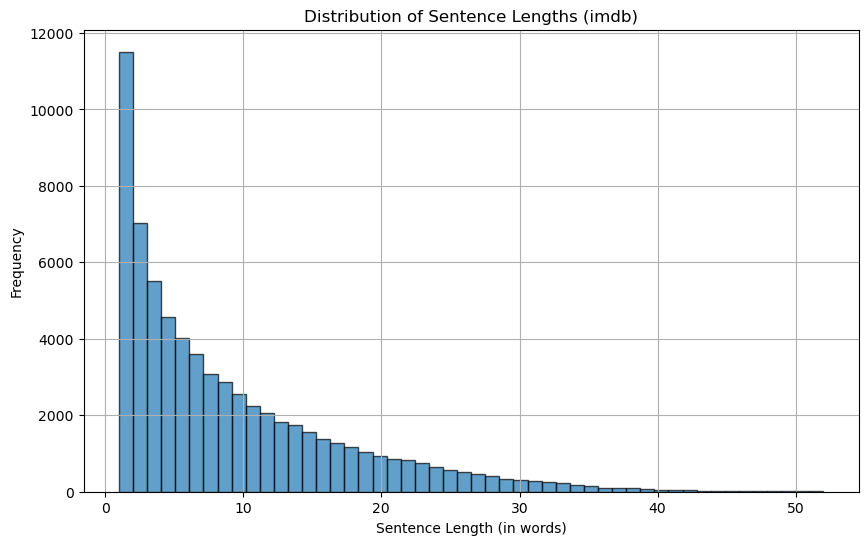

In [6]:
# Load a dataset from Hugging Face
dataset = load_dataset("sst2", split='train')

# Compute the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in dataset['sentence']]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentence Lengths (imdb)')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Load a dataset from Hugging Face
dataset = load_dataset("fancyzhx/amazon_polarity", split='train')

# Compute the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in dataset['content']]

# Count the number of sentences that are shorter than 30 words
short_sentences_count = sum(1 for length in sentence_lengths if (length < 30 and length > 25))

print(f"Number of sentences shorter than 30 words: {short_sentences_count}")

Number of sentences shorter than 30 words: 167370


In [11]:
from datasets import load_dataset
import random

# Load the dataset
dataset = load_dataset("stanfordnlp/imdb", ignore_verifications=True)
test_dataset = dataset["train"]

# Extract the labels and corresponding content
labels = [test_dataset[i]["label"] for i in range(len(test_dataset))]
contents = [test_dataset[i]["text"] for i in range(len(test_dataset))]

# Filter reviews with lengths between 25 and 30 words
filtered_reviews = [(content, label) for content, label in zip(contents, labels) if len(content.split()) <= 40]

# Separate the positive and negative samples
positive_samples = [(content, label) for content, label in filtered_reviews if label == 1]
negative_samples = [(content, label) for content, label in filtered_reviews if label == 0]

# Ensure we have enough samples
if len(positive_samples) < 50 or len(negative_samples) < 50:
    raise ValueError("Not enough samples with the specified word count range.")

# Sample 50 positive and 50 negative examples
sampled_positive = random.sample(positive_samples, 50)
sampled_negative = random.sample(negative_samples, 50)

# Combine the sampled positive and negative examples
sampled_dataset = sampled_positive + sampled_negative

# Separate content and labels for the sampled dataset
sampled_contents = [item[0] for item in sampled_dataset]
sampled_labels = [item[1] for item in sampled_dataset]

# Display the sampled dataset
for content, label in zip(sampled_contents, sampled_labels):
    print(f"Label: {label}, Text: {content}")


/home/xcwei/.local/lib/python3.10/site-packages/datasets/load.py:2524: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Label: 1, Text: Kept my attention from start to finish. Great performances added to this tremendous film. Mr. Pacino once again gives us another brilliant character to enjoy.
Label: 1, Text: This movie is totally wicked! It's really great to see MJH in a different role than her Sabrina character! The plot is totally cool, and the characters are excellently written. Definitely one of the best movies!!
Label: 1, Text: Henry Thomas showed a restraint, even when the third act turned into horrible hollywood resolution that could've killed this movie, that kept the dignity of a redemption story and as for pure creepiness-sniffing babies?
Label: 1, Text: Did Sandra (yes, she must have) know we would still be here for her some nine years later?<br /><br />See it if you haven't, again if you have; see her live while you can.
Label: 1, Text: with very little screen time and money, Dan Katzir manages to do so much. This movie, in its heart-warming simplicity, touches the beauty of love from a fre

In [12]:
from datasets import load_dataset
import random
import pandas as pd
import zipfile
import os
from datasets import Dataset, DatasetDict


In [14]:
# Combine the sampled positive and negative examples
sampled_dataset = sampled_positive + sampled_negative

# Create a DataFrame from the sampled dataset
sampled_df = pd.DataFrame(sampled_dataset, columns=['text', 'label'])

# Create a Hugging Face dataset
sampled_hf_dataset = Dataset.from_pandas(sampled_df)

# Save the dataset to disk
dataset_dict = DatasetDict({"train": sampled_hf_dataset})
dataset_dict.save_to_disk("datasets_imdb")

# Zip the dataset directory
def zipdir(path, ziph):
    # Zip the directory
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(path, '..')))

zipf = zipfile.ZipFile('imdb_sample.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('datasets_imdb', zipf)
zipf.close()

Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

In [15]:
import zipfile
import os
from datasets import load_from_disk

# Unzip the dataset
with zipfile.ZipFile('imdb_sample.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets_imdb')

# Load the dataset from disk
reloaded_dataset = load_from_disk('datasets_imdb')

In [16]:
with zipfile.ZipFile('imdb_sample.zip', 'r') as zip_ref:
        zip_ref.extractall('datasets')
    
dataset =load_from_disk('datasets')
test_dataset = dataset["train"]#"train","validation","test"

In [17]:
reloaded_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 100
    })
})

In [2]:
dataset = load_dataset("imdb", split='train')


In [8]:
for sentence in dataset["text"]: 
    print(sentence)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

